#Whale Optimization Algorithm Sederhana


In [1]:
# 2 Dimensi
import numpy as np

# Fungsi yang ingin diminimalkan
def objective_function(pos):
    x, y,  = pos
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Inisialisasi parameter WOA
num_whales = 10
max_iter = 100
dim = 2
lb = -10
ub = 10

a_linear = lambda t: 2 - t * (2 / max_iter)

# Inisialisasi populasi
positions = np.random.uniform(lb, ub, (num_whales, dim))
fitness = np.array([objective_function(pos) for pos in positions])
best_idx = np.argmin(fitness)
best_position = positions[best_idx].copy()
best_score = fitness[best_idx]

# Algoritma utama
for t in range(max_iter):
    a = a_linear(t)
    for i in range(num_whales):
        r1 = np.random.rand() # bisa dioptimasi
        r2 = np.random.rand() # bisa dioptimasi
        A = 2 * a * r1 - a
        C = 2 * r2

        p = np.random.rand() # bisa dioptimasi
        if p < 0.5:
            if abs(A) < 1:
                D = abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                rand_idx = np.random.randint(num_whales)
                D = abs(C * positions[rand_idx] - positions[i])
                positions[i] = positions[rand_idx] - A * D
        else:
            D = abs(best_position - positions[i])
            b = 1
            l = np.random.uniform(-1, 1)
            positions[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

        # Batasi dalam ruang pencarian
        positions[i] = np.clip(positions[i], lb, ub)

    # Evaluasi dan update
    fitness = np.array([objective_function(pos) for pos in positions])
    current_best_idx = np.argmin(fitness)
    if fitness[current_best_idx] < best_score:
        best_score = fitness[current_best_idx]
        best_position = positions[current_best_idx].copy()

# Hasil akhir
print(f"Minimum ditemukan di x = {best_position[0]}, y = {best_position[1]}")
print(f"Nilai minimum f(x, y) = {best_score}")

Minimum ditemukan di x = 0.10617436482089762, y = 3.724161636548735
Nilai minimum f(x, y) = 1.4384778316772484


p < 0,5 (|A| < 1) = Paus mengejar mangsa (exploitation)
𝑋baru = 𝑋* − 𝐴 ⋅ 𝐷 (kalau |A| < 1

p < 0,5 (|A| >= 1) =
Xbaru = Xacak − A⋅D

p > 0,5 (Paus membuat spiral mengejar mangsa (bubble-net attack))
Xbaru = D' ⋅ e^bl ⋅ cos(2πl) + X*

Dengan =
- D' = |X* - X|
- b = konstanta spiral (biassanya 1)
- l = bilangan acak di [-1,1]

#Whale Optimization Algorithm (Dimensi > 2)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETER ---
n = 29
dim = n + 1
num_whales = 10
max_iter = 500
lb, ub = -10, 10

# --- FUNGSI OBJEKTIF: f(x) = sum(x^2), minimum di x=0 ---
def objective_function(pos):
    return np.sum(pos**2)

# --- INISIALISASI ---
positions = np.random.uniform(lb, ub, (num_whales, dim))
fitness = np.array([objective_function(pos) for pos in positions])
best_idx = np.argmin(fitness)
best_position = positions[best_idx].copy()
best_score = fitness[best_idx]

history = [best_score]
a_linear = lambda t: 2 - (t - 1) * (2 / max_iter)

print("\n--- PROSES ITERASI ---")
# --- ALGORITMA WOA ---
for t in range(1, max_iter + 1):
    a = a_linear(t)
    for i in range(num_whales):
        r1, r2 = np.random.rand(), np.random.rand()
        A = 2 * a * r1 - a
        C = 2 * r2
        p = np.random.rand()

        if p < 0.5:
            if abs(A) < 1:
                D = abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                rand_idx = np.random.randint(num_whales)
                D = abs(C * positions[rand_idx] - positions[i])
                positions[i] = positions[rand_idx] - A * D
        else:
            D = abs(best_position - positions[i])
            b = 1
            l = np.random.uniform(-1, 1)
            positions[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

        positions[i] = np.clip(positions[i], lb, ub)

    fitness = np.array([objective_function(pos) for pos in positions])
    current_best_idx = np.argmin(fitness)
    if fitness[current_best_idx] < best_score:
        best_score = fitness[current_best_idx]
        best_position = positions[current_best_idx].copy()

    history.append(best_score)
    if t % 1000 == 0 or t == 1:
        print(f"Iterasi {t}: Fitness terbaik = {best_score:.6f}")

# --- OUTPUT AKHIR ---
print("\n--- HASIL AKHIR ---")
print(f"Minimum ditemukan pada posisi x = {best_position}")
print(f"Nilai minimum f(X) = {best_score:.6f}")


--- PROSES ITERASI ---
Iterasi 1: Fitness terbaik = 742.614523

--- HASIL AKHIR ---
Minimum ditemukan pada posisi x = [-3.33431561e-34 -6.98812860e-34 -5.41746686e-34  7.29385068e-34
  1.80237687e-33 -1.37497961e-34  8.50512280e-33 -3.42707139e-34
  1.21717477e-35 -6.09158276e-34 -4.30345937e-33  1.70329442e-33
 -8.40403090e-34  2.19112828e-33  1.07417049e-33 -1.14998553e-33
 -5.33173779e-34 -1.66803473e-33 -1.89573672e-33 -1.79415686e-34
  9.07292078e-34 -1.42809558e-33  4.16353414e-35 -4.08485157e-34
 -1.49516974e-33 -8.03706100e-33  7.36460475e-34 -7.37631548e-34
  1.43144503e-33 -5.70449841e-34]
Nilai minimum f(X) = 0.000000


#Visualisasi Konvergensi

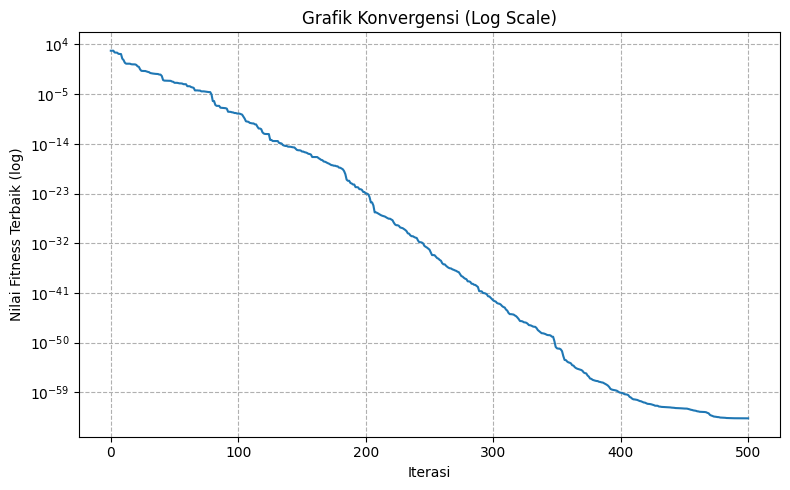

In [3]:
# --- GRAFIK KONVERGENSI ---
plt.figure(figsize=(8, 5))
plt.plot(history)
plt.yscale('log')
plt.title("Grafik Konvergensi (Log Scale)")
plt.xlabel("Iterasi")
plt.ylabel("Nilai Fitness Terbaik (log)")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

#Visualisasi Rata-rata Fitness

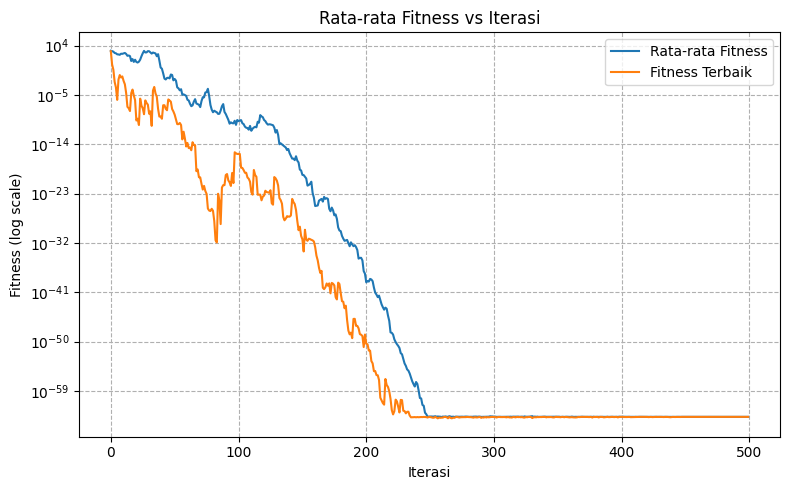

In [4]:
# --- GRAFIK RATA-RATA FITNESS DAN DIVERSITY ---

avg_fitness_history = []
max_fitness_history = []
min_fitness_history = []

# Hitung histori lengkap selama iterasi (simpan semua fitness)
all_fitness_history = []

# Ulangi proses WOA untuk menyimpan semua fitness (mirip loop utama)
positions = np.random.uniform(lb, ub, (num_whales, dim))
for t in range(max_iter):
    a = a_linear(t)
    fitness = np.array([objective_function(pos) for pos in positions])
    all_fitness_history.append(fitness)

    avg_fitness_history.append(np.mean(fitness))
    max_fitness_history.append(np.max(fitness))
    min_fitness_history.append(np.min(fitness))

    for i in range(num_whales):
        r1, r2 = np.random.rand(), np.random.rand()
        A = 2 * a * r1 - a
        C = 2 * r2
        p = np.random.rand()

        if p < 0.5:
            if abs(A) < 1:
                D = abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                rand_idx = np.random.randint(num_whales)
                D = abs(C * positions[rand_idx] - positions[i])
                positions[i] = positions[rand_idx] - A * D
        else:
            D = abs(best_position - positions[i])
            b = 1
            l = np.random.uniform(-1, 1)
            positions[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position
        positions[i] = np.clip(positions[i], lb, ub)

# --- PLOT 1: RATA-RATA FITNESS ---
plt.figure(figsize=(8, 5))
plt.plot(avg_fitness_history, label="Rata-rata Fitness")
plt.plot(min_fitness_history, label="Fitness Terbaik")
plt.yscale('log')
plt.title("Rata-rata Fitness vs Iterasi")
plt.xlabel("Iterasi")
plt.ylabel("Fitness (log scale)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

#Visualisasi Diversity

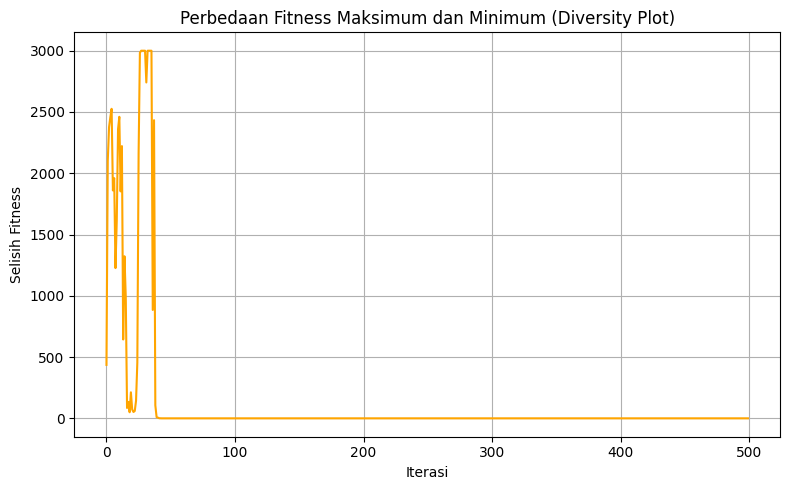

In [5]:
# --- PLOT 2: DIVERSITY FITNESS (MAX - MIN) ---
diversity = np.array(max_fitness_history) - np.array(min_fitness_history)

plt.figure(figsize=(8, 5))
plt.plot(diversity, color="orange")
plt.title("Perbedaan Fitness Maksimum dan Minimum (Diversity Plot)")
plt.xlabel("Iterasi")
plt.ylabel("Selisih Fitness")
plt.grid(True)
plt.tight_layout()
plt.show()

#Visualisasi PCA dan T-SNE
Warna menunjukkan iterasi (semakin terang → iterasi lebih tinggi).

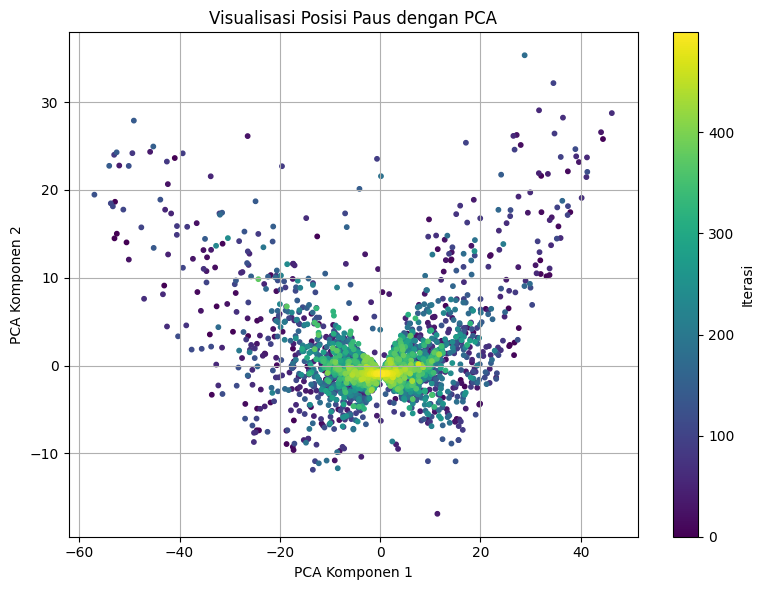

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- SIMPAN SEMUA POSISI PAUS SELAMA ITERASI ---
all_positions = []  # ukuran: (max_iter * num_whales, dim)
position_labels = []  # untuk menandai iterasi

positions = np.random.uniform(lb, ub, (num_whales, dim))
best_position = positions[np.argmin([objective_function(p) for p in positions])].copy()
for t in range(max_iter):
    a = a_linear(t)
    for i in range(num_whales):
        r1, r2 = np.random.rand(), np.random.rand()
        A = 2 * a * r1 - a
        C = 2 * r2
        p = np.random.rand()

        if p < 0.5:
            if abs(A) < 1:
                D = abs(C * best_position - positions[i])
                positions[i] = best_position - A * D
            else:
                rand_idx = np.random.randint(num_whales)
                D = abs(C * positions[rand_idx] - positions[i])
                positions[i] = positions[rand_idx] - A * D
        else:
            D = abs(best_position - positions[i])
            b = 1
            l = np.random.uniform(-1, 1)
            positions[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

        positions[i] = np.clip(positions[i], lb, ub)
        all_positions.append(positions[i].copy())
        position_labels.append(t)  # simpan label iterasi

# Convert to numpy array
all_positions = np.array(all_positions)
position_labels = np.array(position_labels)

# --- PCA VISUALIZATION ---
pca = PCA(n_components=2)
pca_proj = pca.fit_transform(all_positions)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c=position_labels, cmap='viridis', s=10)
plt.title("Visualisasi Posisi Paus dengan PCA")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Iterasi")
plt.grid(True)
plt.tight_layout()
plt.show()

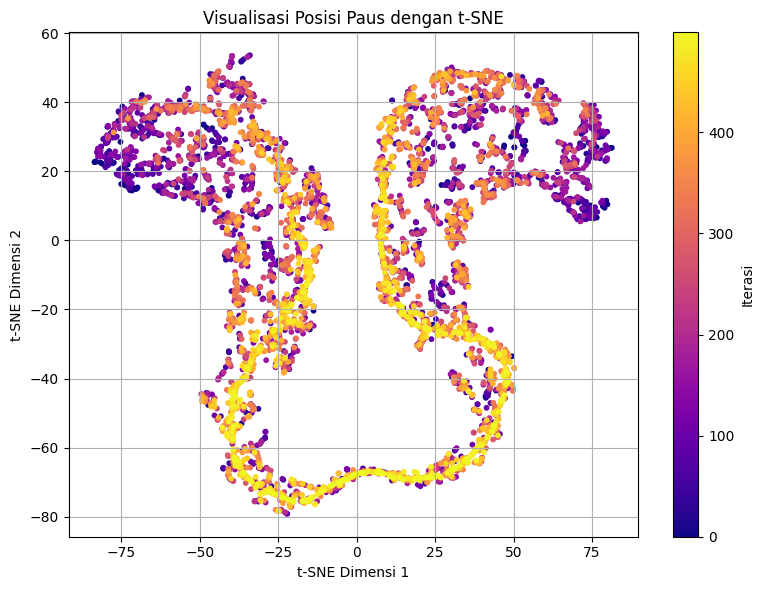

In [7]:
# --- t-SNE VISUALIZATION ---
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_proj = tsne.fit_transform(all_positions)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c=position_labels, cmap='plasma', s=10)
plt.title("Visualisasi Posisi Paus dengan t-SNE")
plt.xlabel("t-SNE Dimensi 1")
plt.ylabel("t-SNE Dimensi 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Iterasi")
plt.grid(True)
plt.tight_layout()
plt.show()

# IWOA dan IWOA +


--- PROSES ITERASI ---
Iterasi 1: Fitness terbaik = 683.499480
Iterasi 100: Fitness terbaik = 299.935956
Iterasi 200: Fitness terbaik = 299.802748
Iterasi 300: Fitness terbaik = 33.038654
Iterasi 400: Fitness terbaik = 0.000135
Iterasi 500: Fitness terbaik = 0.000000

--- HASIL AKHIR ---
Minimum ditemukan pada posisi x = [ 3.41477868e-05 -9.46844379e-06  1.30773218e-05  1.31412665e-05
 -8.50659837e-09 -3.55234197e-05 -3.37715853e-05 -8.01340547e-06
  7.92912906e-06  3.60861638e-06 -5.58194095e-05 -5.65952517e-05
 -2.20391071e-06 -3.60329944e-07  9.73070891e-06 -2.38923362e-05
  1.40302686e-05  6.32065652e-05 -1.94559024e-05  1.14390646e-05
  1.61271542e-05  5.15178364e-06 -3.28429405e-06  1.15745711e-05
 -9.40094032e-06 -8.80688622e-06  1.15506100e-05  1.78638505e-05
  2.96714992e-05 -1.79430574e-05]
Nilai minimum f(X) = 0.000000


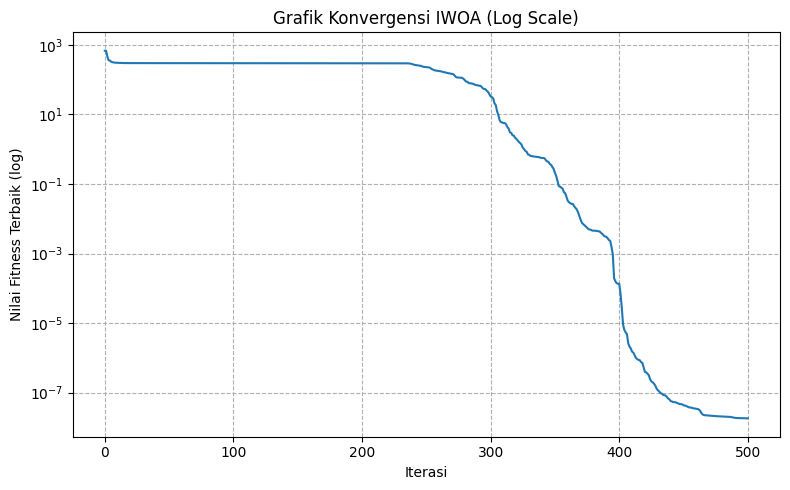

In [8]:
# IWOA

import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETER ---
n = 29
dim = n + 1
num_whales = 10
max_iter = 500
lb, ub = -10, 10

F_lower, F_upper = 0.2, 0.8  # untuk DE
CR = 0.9                     # crossover rate

# --- FUNGSI OBJEKTIF: Sphere Function ---
def objective_function(pos):
    return np.sum(pos**2)

# --- INISIALISASI ---
positions = np.random.uniform(lb, ub, (num_whales, dim))
fitness = np.array([objective_function(p) for p in positions])
best_idx = np.argmin(fitness)
best_position = positions[best_idx].copy()
best_score = fitness[best_idx]

history = [best_score]

# --- ITERASI IWOA ---
print("\n--- PROSES ITERASI ---")
for t in range(1, max_iter + 1):
    a = 2 - (t - 1) * (2 / max_iter)
    k = 1 - (t / max_iter)

    for i in range(num_whales):
        p = np.random.rand()

        if p <= k:
            # --- DE Mutation ---
            idxs = [idx for idx in range(num_whales) if idx != i]
            r1, r2, r3 = np.random.choice(idxs, 3, replace=False)

            F = np.random.uniform(F_lower, F_upper)
            donor = best_position + F * (positions[r2] - positions[r3])

            trial = np.copy(positions[i])
            for j in range(dim):
                if np.random.rand() < CR:
                    trial[j] = donor[j]

            # Repair jika keluar batas
            trial = np.clip(trial, lb, ub)

            # Seleksi elitisme
            if objective_function(trial) < objective_function(positions[i]):
                positions[i] = trial

        else:
            r1, r2 = np.random.rand(), np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2

            if p < 0.5:
                if abs(A) < 1:
                    D = abs(C * best_position - positions[i])
                    new_pos = best_position - A * D
                else:
                    rand_idx = np.random.randint(num_whales)
                    D = abs(C * positions[rand_idx] - positions[i])
                    new_pos = positions[rand_idx] - A * D
            else:
                D = abs(best_position - positions[i])
                b = 1
                l = np.random.uniform(-1, 1)
                new_pos = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

            # Repair dan update
            new_pos = np.clip(new_pos, lb, ub)
            if objective_function(new_pos) < objective_function(positions[i]):
                positions[i] = new_pos

    # Evaluasi dan pembaruan global best
    fitness = np.array([objective_function(p) for p in positions])
    current_best_idx = np.argmin(fitness)
    if fitness[current_best_idx] < best_score:
        best_score = fitness[current_best_idx]
        best_position = positions[current_best_idx].copy()

    history.append(best_score)

    if t % 100 == 0 or t == 1:
        print(f"Iterasi {t}: Fitness terbaik = {best_score:.6f}")

# --- HASIL AKHIR ---
print("\n--- HASIL AKHIR ---")
print(f"Minimum ditemukan pada posisi x = {best_position}")
print(f"Nilai minimum f(X) = {best_score:.6f}")

# --- GRAFIK KONVERGENSI ---
plt.figure(figsize=(8, 5))
plt.plot(history)
plt.yscale('log')
plt.title("Grafik Konvergensi IWOA (Log Scale)")
plt.xlabel("Iterasi")
plt.ylabel("Nilai Fitness Terbaik (log)")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


--- PROSES ITERASI IWOA+ ---
Iterasi 1: Fitness terbaik = 533.494002
Iterasi 100: Fitness terbaik = 235.929995
Iterasi 200: Fitness terbaik = 235.929746
Iterasi 300: Fitness terbaik = 62.621741
Iterasi 400: Fitness terbaik = 0.000123
Iterasi 500: Fitness terbaik = 0.000001

--- HASIL AKHIR ---
Minimum ditemukan pada posisi x = [-6.69128912e-06 -7.79818418e-05 -1.29251207e-04  2.76800852e-04
 -3.98669626e-04  1.54317536e-05 -2.63532809e-04 -1.64553956e-05
 -2.16466558e-04  2.98440993e-04 -4.72339027e-04  1.84024432e-04
  1.39349411e-04 -2.56980422e-05  2.20826599e-05  3.55703389e-04
  8.89773226e-05 -1.40560792e-05 -4.93260858e-05 -4.07390192e-05
  2.34830329e-05  2.73051399e-04 -5.62769809e-05  2.62968205e-04
  9.60203985e-05 -2.38102875e-04  6.43142145e-05 -2.03735921e-04
  1.79551206e-04  1.65676892e-04]
Nilai minimum f(X) = 0.000001


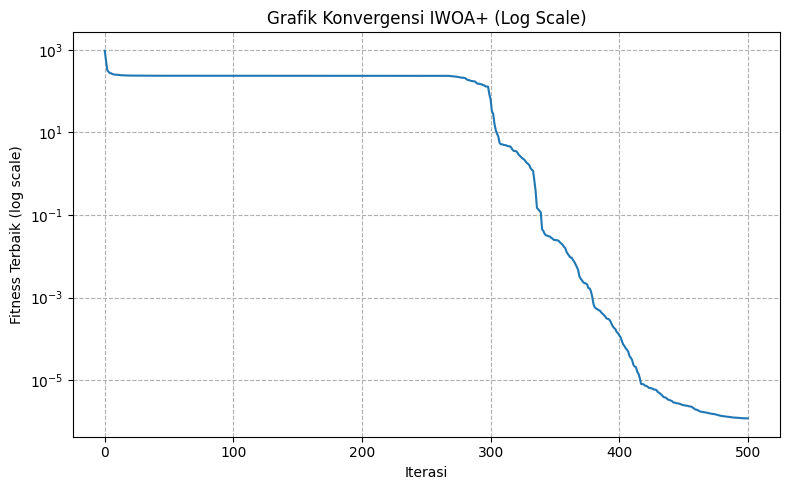

In [9]:
# IWOA+
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETER ---
n = 29
dim = n + 1
num_whales = 10
max_iter = 500
lb, ub = -10, 10

F_lower, F_upper = 0.2, 0.8
CR = 0.9
T_stagnan = 30  # batas iterasi stagnan

# --- FUNGSI OBJEKTIF ---
def objective_function(pos):
    return np.sum(pos**2)

# --- INISIALISASI ---
positions = np.random.uniform(lb, ub, (num_whales, dim))
fitness = np.array([objective_function(p) for p in positions])
best_idx = np.argmin(fitness)
best_position = positions[best_idx].copy()
best_score = fitness[best_idx]
stagnation_counter = np.zeros(num_whales)

history = [best_score]

print("\n--- PROSES ITERASI IWOA+ ---")
for t in range(1, max_iter + 1):
    a = 2 - (t - 1) * (2 / max_iter)
    k = 1 - (t / max_iter)

    for i in range(num_whales):
        current_fitness = fitness[i]
        p = np.random.rand()

        # --- CEK STAGNAN: Jika terlalu lama, reset paus ---
        if stagnation_counter[i] >= T_stagnan:
            positions[i] = np.random.uniform(lb, ub, dim)
            fitness[i] = objective_function(positions[i])
            stagnation_counter[i] = 0
            continue  # lanjut ke paus berikutnya

        # --- ADAPTIVE SWITCHING STRATEGY ---
        if p <= k:
            # DE Mutation + Crossover
            idxs = [idx for idx in range(num_whales) if idx != i]
            r1, r2, r3 = np.random.choice(idxs, 3, replace=False)
            F = np.random.uniform(F_lower, F_upper)
            donor = best_position + F * (positions[r2] - positions[r3])

            trial = positions[i].copy()
            for j in range(dim):
                if np.random.rand() < CR:
                    trial[j] = donor[j]

            trial = np.clip(trial, lb, ub)

        else:
            # WOA Original Behavior
            r1, r2 = np.random.rand(), np.random.rand()
            A = 2 * a * r1 - a
            C = 2 * r2

            if p < 0.5:
                if abs(A) < 1:
                    D = abs(C * best_position - positions[i])
                    trial = best_position - A * D
                else:
                    rand_idx = np.random.randint(num_whales)
                    D = abs(C * positions[rand_idx] - positions[i])
                    trial = positions[rand_idx] - A * D
            else:
                D = abs(best_position - positions[i])
                b = 1
                l = np.random.uniform(-1, 1)
                trial = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

            trial = np.clip(trial, lb, ub)

        # --- SELEKSI ELITISME ---
        trial_fitness = objective_function(trial)
        if trial_fitness < current_fitness:
            positions[i] = trial
            fitness[i] = trial_fitness
            stagnation_counter[i] = 0  # reset karena membaik
        else:
            stagnation_counter[i] += 1  # stagnan bertambah

    # Update global best
    current_best_idx = np.argmin(fitness)
    if fitness[current_best_idx] < best_score:
        best_score = fitness[current_best_idx]
        best_position = positions[current_best_idx].copy()

    history.append(best_score)

    if t % 100 == 0 or t == 1:
        print(f"Iterasi {t}: Fitness terbaik = {best_score:.6f}")

# --- OUTPUT ---
print("\n--- HASIL AKHIR ---")
print(f"Minimum ditemukan pada posisi x = {best_position}")
print(f"Nilai minimum f(X) = {best_score:.6f}")

# --- GRAFIK KONVERGENSI ---
plt.figure(figsize=(8, 5))
plt.plot(history)
plt.yscale('log')
plt.title("Grafik Konvergensi IWOA+ (Log Scale)")
plt.xlabel("Iterasi")
plt.ylabel("Fitness Terbaik (log scale)")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()